[https://github.com/Azure/Spark-Operationalization-On-Azure/blob/master/tutorials/cntk/realtime/image-classification/image_classification.md](https://github.com/Azure/Spark-Operationalization-On-Azure/blob/master/tutorials/cntk/realtime/image-classification/image_classification.md)

```
$ aml service create realtime -r cntk-py -f driver.py -m resnet.dnn -n cntksrvc2
```

In [38]:
import base64
import urllib
import requests
import json
from PIL import Image, ImageOps
from io import BytesIO
%matplotlib inline

In [39]:
URL = 'http://blog.3plearning.com/wp-content/uploads/2013/06/plane-600x337.png'

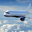

In [40]:
file = BytesIO(urllib.request.urlopen(URL).read())
img = Image.open(file).convert('RGB')
# Model trained on 32 by 32
img = ImageOps.fit(img, (32, 32), Image.ANTIALIAS)
img

In [41]:
imgio = BytesIO()
img.save(imgio, 'PNG')
imgio.seek(0)
dataimg = base64.b64encode(imgio.read())
jsonimg = json.dumps({
        'input':'[\"' + dataimg.decode('utf-8') + '\"]'})

In [42]:
url = 'http://iliatestdeployacsagent.eastus.cloudapp.azure.com/score'
headers = {'content-type': 'application/json',
           'X-Marathon-App-Id': '/cntksrvc2'}

In [43]:
%time r = requests.post(url, data=jsonimg, headers=headers)

CPU times: user 3.32 ms, sys: 2.11 ms, total: 5.44 ms
Wall time: 177 ms


In [44]:
classi, classipct = r.json()['result'][0][0][0]
classi

'airplane'